# SVM (support Vector Machine)


In [1]:
import numpy as np
from sklearn import svm

# features
X = np.array([[-3, -1], [0, -2], [-2.5, 2], [-1, -1], [3, .5], [.5, 3], [-3, -3]])

# labels
y = np.array([0, 1, 0, 1, 1, 0, 1])

#fit
clf = svm.SVC(kernel='linear').fit(X, y)


# predict
clf.predict([[2, 4]])   

array([0])

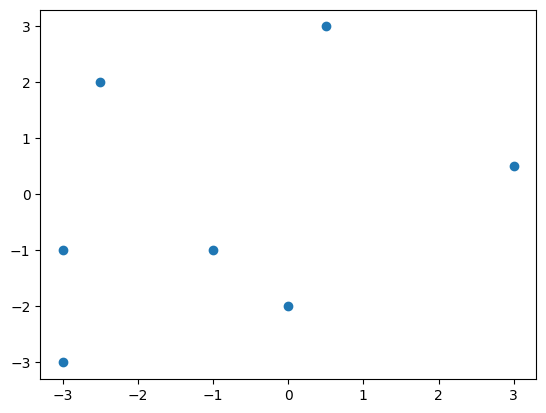

In [2]:
from matplotlib import pyplot as plt
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [3]:
class MYSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iter=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iter = n_iter
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)
        
        # initial weights
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr *(2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr *y_[idx]
    
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

(327, 301) (327, 301)
[0 0 0 ... 0 0 0]


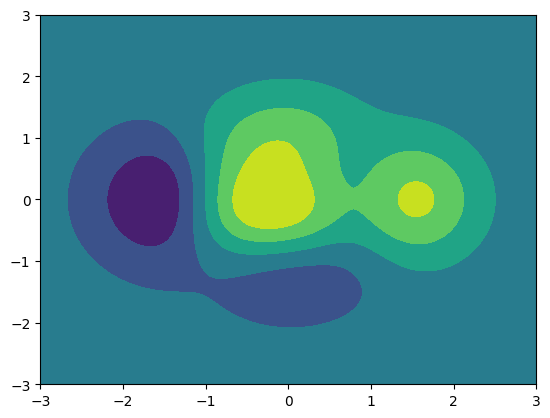

In [6]:

# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 256), np.linspace(-3, 3, 256))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)
levels = np.linspace(Z.min(), Z.max(), 7)

# plot
fig, ax = plt.subplots()
ax.contourf(X, Y, Z, levels=levels)
plt.show()

In [11]:
print(X.shape)
print(Y.shape)
print(levels)

(256, 256)
(256, 256)
[-0.6863404  -0.39579962 -0.10525883  0.18528195  0.47582273  0.76636351
  1.0569043 ]


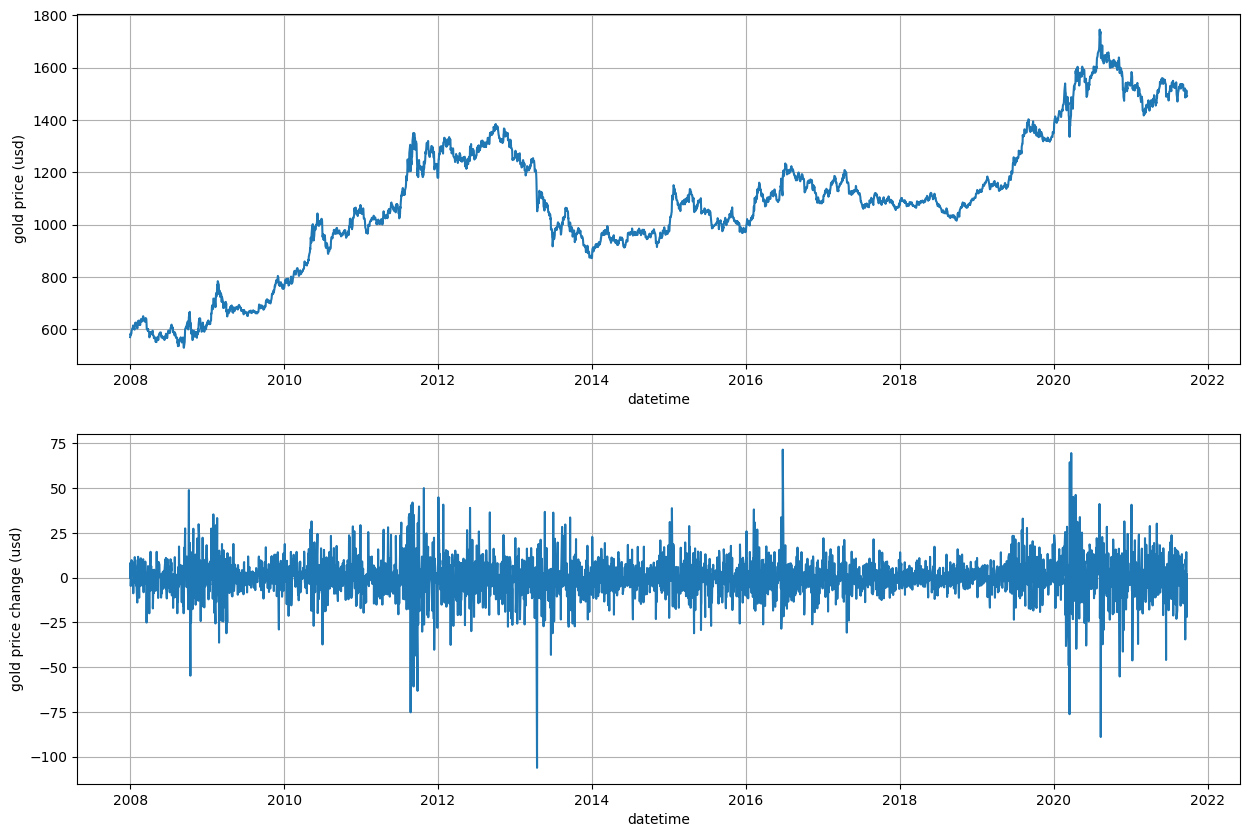

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

base_dir = "https://github.com/natsunoyuki/Data_Science/blob/master/gold/gold/gold_price_usd.csv?raw=True"

data = pd.read_csv(base_dir)

# Convert the datetime from str to datetime object.
data["datetime"] = pd.to_datetime(data["datetime"])

# Determine the daily change in gold price.
data["gold_price_change"] = data["gold_price_usd"].diff()

# Restrict the data to later than 2008 Jan 01.
data = data[data["datetime"] >= pd.to_datetime("2008-01-01")]

# Plot the daily gold prices as well as the daily change.
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
plt.plot(data["datetime"], data["gold_price_usd"])
plt.xlabel("datetime")
plt.ylabel("gold price (usd)")
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(data["datetime"], data["gold_price_change"])
plt.xlabel("datetime")
plt.ylabel("gold price change (usd)")
plt.grid(True)
plt.show()


In [26]:
# Use the daily change in gold price as the observed measurements X.
X = data[["gold_price_change"]].values
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)
print("Unique states:")
print(states)
print("\nStart probabilities:")
print(model.startprob_)
print("\nTransition matrix:")
print(model.transmat_)
print("\nGaussian distribution means:")
print(model.means_)
print("\nGaussian distribution covariances:")
print(model.covars_)

Unique states:
[0 1 2]

Start probabilities:
[9.99940723e-01 5.92768513e-05 1.63424176e-53]

Transition matrix:
[[6.96098736e-02 9.29943355e-01 4.46771185e-04]
 [8.08441180e-01 1.40947847e-01 5.06109730e-02]
 [3.59032620e-02 4.57357172e-02 9.18361021e-01]]

Gaussian distribution means:
[[0.2992196 ]
 [0.17730455]
 [0.32453049]]

Gaussian distribution covariances:
[[[ 27.49360337]]

 [[ 79.3889224 ]]

 [[327.25997764]]]


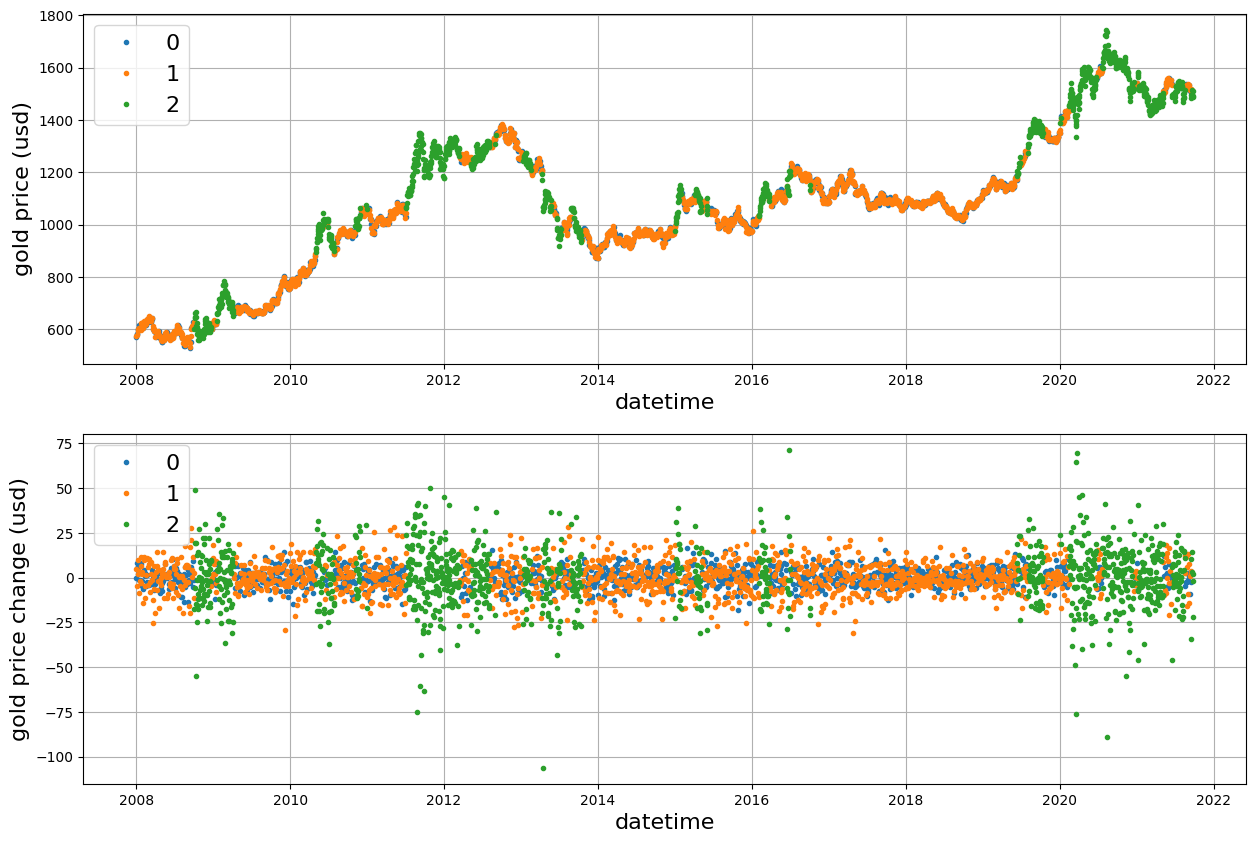

In [27]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_usd"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price (usd)", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = data["datetime"].iloc[want]
    y = data["gold_price_change"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("datetime", fontsize=16)
plt.ylabel("gold price change (usd)", fontsize=16)
plt.show()

In [31]:
from hmmlearn import hmm
import numpy as np

# Define the transition matrix
transmat = np.array([[0.7, 0.3], [0.3, 0.7]])

# Define the emission matrix
emissionprob = np.array([[0.9, 0.1], [0.2, 0.8]])

# Define the initial distribution
startprob = np.array([0.6, 0.4])

# Create an instance of the model
# model = hmm.MultinomialHMM(n_components=2)
model = hmm.CategoricalHMM(n_components=2)
# Set the parameters
model.startprob_ = startprob
model.transmat_ = transmat
model.emissionprob_ = emissionprob

# Given the current weather (observation), predict the weather for the next day
current_weather = np.array([[0]]).T
logprob, next_day_weather = model.decode(current_weather, algorithm="viterbi")

print("The predicted weather for the next day is:", next_day_weather)


The predicted weather for the next day is: [0]


# Optimization 7
# <https://github.com/Hyukppen/Optimization/blob/main/7.%20SVM/SVM_IPM.py>

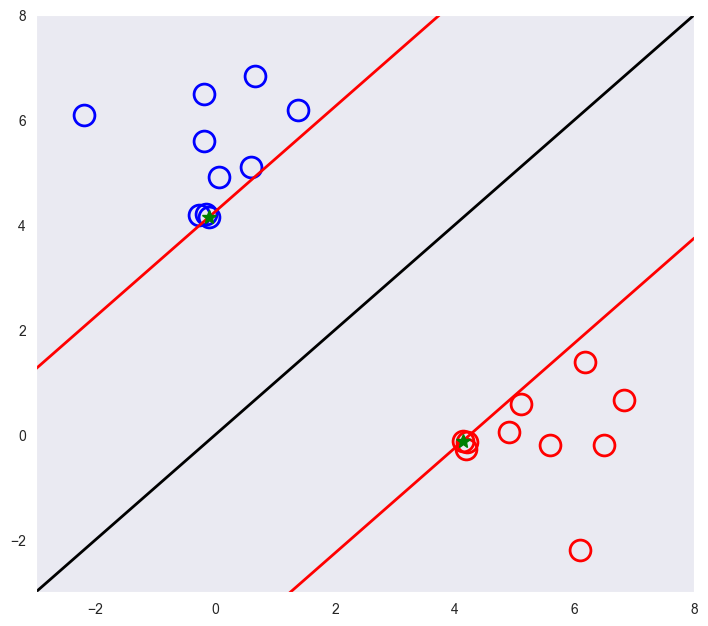

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import time
# %% SVM - Primal-Dual IPM

plt.close('all')
Nh=20; Ns=0; N=Nh+Ns
r1=np.random.randn(int(Nh/2),1); r2=np.random.randn(int(Nh/2),1)+5
s1=np.ones((int(Nh/2),1)); s2=-1*np.ones((int(Nh/2),1))

# case 1
x=np.vstack((r1,r2))
y=np.vstack((r2,r1))
s=np.vstack((s1,s2))
xmin= -3; xmax= 8; ymin= -3; ymax = 8

# case 2
# Nh=20; Ns=2; N=Nh+Ns
# x=np.vstack((r1,r2, 3, 2))
# y=np.vstack((r2,r1, 2, 2))
# s=np.vstack((s1,s2, 1, -1))
# xmin= -3; xmax= 8; ymin= -3; ymax = 8

mu_ini=1*np.ones((N,1))
wk=np.vstack((-1,1,0,mu_ini))
tl=1;
figure = plt.figure(figsize=[8.5, 7.5])

plt.grid()
plt.plot(x[s==-1],y[s==-1],'ro',fillstyle="none",markersize=15,markeredgewidth=2)
plt.plot(x[s==1],y[s==1],'bo',fillstyle="none",markersize=15,markeredgewidth=2)
plt.axis([xmin, xmax, ymin, ymax])
x_plot=np.linspace(xmin,xmax,100)

for k in range(50):
    tl1=0.8*tl
    t=tl1

    a=wk[0].reshape(1,1)
    b=wk[1].reshape(1,1)
    c=wk[2].reshape(1,1)
    mu=wk[3:]

    ab=np.hstack((a,b))
    xy=np.vstack((np.transpose(x), np.transpose(y)))
    g=s*np.transpose(c-ab@xy)+1

    dgdx = np.hstack((-s*x, -s*y, s))

    R1 = np.vstack((a,b,0)) + np.transpose(dgdx)@mu
    R2 = mu*g + t*np.ones((N,1))
    R = np.vstack((R1,R2))

    B1 = np.array([ [1, 0, 0], [0, 1, 0], [0, 0, 0] ])
    B2 = np.transpose(dgdx)
    B3 = np.diag(np.squeeze(mu))@dgdx
    B4 = np.diag(np.squeeze(g))
    dRdw=np.block([ [B1,B2] , [B3,B4] ])

    wk1=wk-np.linalg.inv(dRdw)@R

    wk=wk1
    tl=tl1

    plt.cla()

    plt.plot(x[s==1],y[s==1],'bo',fillstyle="none",markersize=15,markeredgewidth=2)
    plt.grid()
    plt.plot(x[s==-1],y[s==-1],'ro',fillstyle="none",markersize=15,markeredgewidth=2)
    plt.axis([xmin, xmax, ymin, ymax])
    plt.plot(x_plot,np.squeeze(-a/b*x_plot+c/b),'k',linewidth=2)
    plt.plot(x_plot,np.squeeze(-a/b*x_plot+(c+1)/b),'r',linewidth=2)
    plt.plot(x_plot,np.squeeze(-a/b*x_plot+(c-1)/b),'r',linewidth=2)
    plt.plot(x[abs(mu)>0.001],y[abs(mu)>0.001],'*g',markersize=10,markerfacecolor='g')

    figure.canvas.draw(); figure.canvas.flush_events(); time.sleep(0.01)




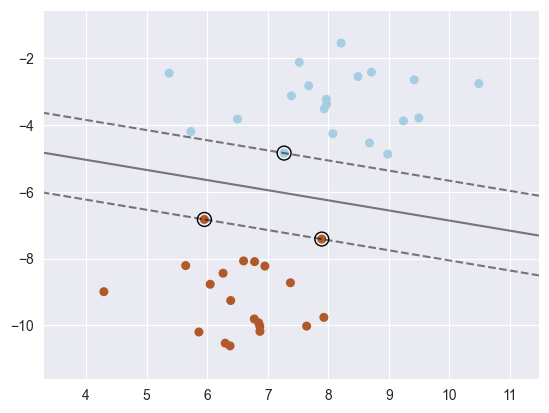

In [4]:
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.inspection import DecisionBoundaryDisplay

# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel="linear", C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
    ax=ax,
)
# plot support vectors
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
)
plt.show()